In [2]:
import pandas as pd

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(url)

# Display the first five rows
print(titanic.head())

# Fill missing values in the 'Age' column with the median age
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Create a new column 'FamilySize' as the sum of 'SibSp' and 'Parch'
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

# Drop the 'Cabin' column
titanic.drop(columns=['Cabin'], inplace=True)

# Display the first five rows after manipulation
print(titanic.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

Survival Rate: 0.38


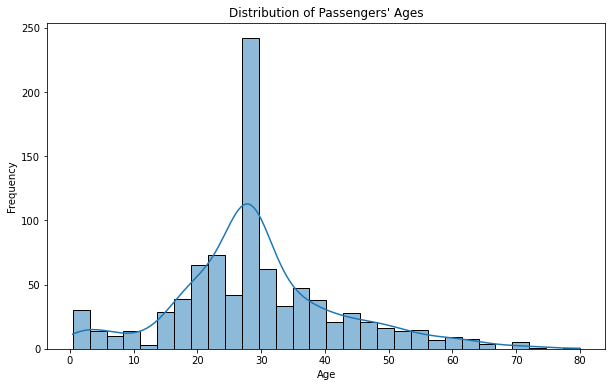

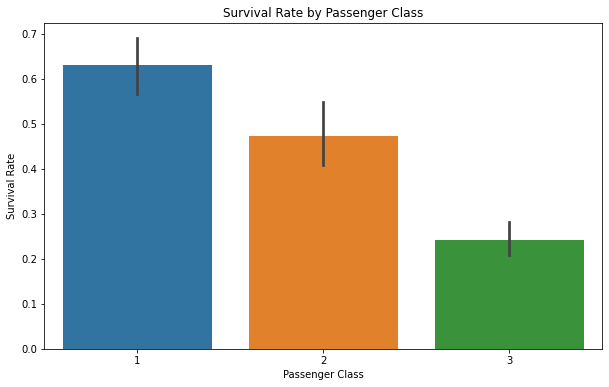

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the survival rate
survival_rate = titanic['Survived'].mean()
print(f'Survival Rate: {survival_rate:.2f}')

# Plot the distribution of passengers' ages
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=30, kde=True)
plt.title('Distribution of Passengers\' Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Create a bar plot showing the survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


In [5]:

from scipy.stats import ttest_ind

# Separate survivors and non-survivors
survivors = titanic[titanic['Survived'] == 1]['Age']
non_survivors = titanic[titanic['Survived'] == 0]['Age']

# Perform a t-test
t_stat, p_value = ttest_ind(survivors, non_survivors)
print(f'T-statistic: {t_stat:.2f}, P-value: {p_value:.2f}')


T-statistic: -1.94, P-value: 0.05


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the feature columns and target
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
target = 'Survived'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(titanic[features], titanic[target], test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.73


In [7]:
# Example dataset with missing and inconsistent data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', None, 'Eve'],
    'Age': [25, 30, None, 22, 29],
    'Gender': ['F', 'M', 'M', 'F', None],
    'Salary': ['50000', '60000', '70000', '40000', '50000']
}
df = pd.DataFrame(data)

# Handle missing values
df['Name'].fillna('Unknown', inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Gender'].fillna('Unknown', inplace=True)

# Correct data types
df['Salary'] = df['Salary'].astype(int)

# Standardize categorical variables
df['Gender'] = df['Gender'].map({'F': 'Female', 'M': 'Male', 'Unknown': 'Unknown'})

print(df)


      Name   Age   Gender  Salary
0    Alice  25.0   Female   50000
1      Bob  30.0     Male   60000
2  Charlie  27.0     Male   70000
3  Unknown  22.0   Female   40000
4      Eve  29.0  Unknown   50000
